In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import os

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datamunge/sign-language-mnist")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 62.6M/62.6M [00:47<00:00, 1.39MB/s]

Extracting files...


Path to dataset files: C:\Users\DELL\.cache\kagglehub\datasets\datamunge\sign-language-mnist\versions\1


In [3]:
!pip install kagglehub

In [5]:
dataset_path = kagglehub.dataset_download("datamunge/sign-language-mnist")

In [6]:
train_csv = os.path.join(dataset_path, "sign_mnist_train.csv")
test_csv = os.path.join(dataset_path, "sign_mnist_test.csv")

In [7]:
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)

In [8]:
y_train = train_df['label']
X_train = train_df.drop('label', axis=1)

In [9]:
y_test = test_df['label']
X_test = test_df.drop('label', axis=1)

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [12]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [13]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(24, activation='softmax')  # Corrected to 24 classes
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9364 - loss: 0.2686
Test Accuracy: 0.9374


In [16]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(28, 28, 1)),  # ✅ Proper way to define input shape
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(24, activation='softmax')  # ✅ Matches 24 output classes
])

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
     

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.4126 - loss: 1.9377 - val_accuracy: 0.8507 - val_loss: 0.4235
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9112 - loss: 0.2722 - val_accuracy: 0.9120 - val_loss: 0.2784
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.9668 - loss: 0.1087 - val_accuracy: 0.9129 - val_loss: 0.2618
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.9805 - loss: 0.0614 - val_accuracy: 0.9314 - val_loss: 0.2366
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9840 - loss: 0.0490 - val_accuracy: 0.9144 - val_loss: 0.2642
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9896 - loss: 0.0341 - val_accuracy: 0.9328 - val_loss: 0.2869
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9899 - loss: 0.0290 - val_accuracy: 0.9230 - val_loss: 0.3263
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9914 - loss: 0.0273 - 

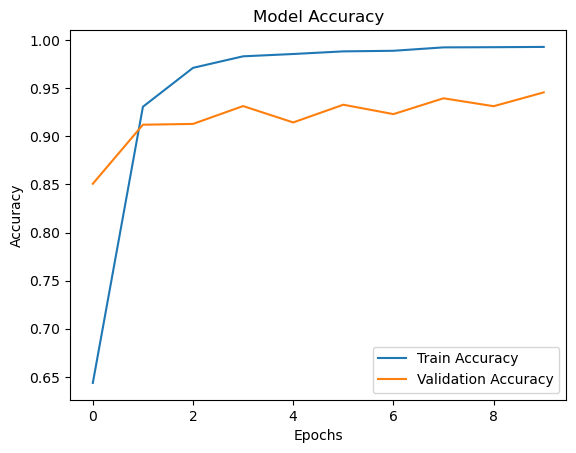

In [20]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [24]:
import cv2
import numpy as np
from PIL import Image
from IPython.display import display

def take_photo(filename='photo.jpg'):
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("❌ Could not access the webcam.")
        return None

    print("📸 Webcam is on. Press SPACE to take a photo, or 'q' to quit.")

    while True:
        ret, frame = cap.read()
        if not ret:
            print("❌ Failed to grab frame.")
            break

        # Show the webcam feed
        cv2.imshow("Press SPACE to capture", frame)

        key = cv2.waitKey(1)
        if key % 256 == 32:  # SPACE key
            cv2.imwrite(filename, frame)
            print(f"✅ Photo saved as {filename}")
            break
        elif key & 0xFF == ord('q'):
            print("❌ Capture cancelled.")
            filename = None
            break

    cap.release()
    cv2.destroyAllWindows()

    if filename:
        # Load and display the captured image in notebook
        image = Image.open(filename)
        display(image)

    return filename

ModuleNotFoundError: No module named 'cv2'

In [ ]:
!pip install opencv-python